A. Import The Necessary Packages

In [2]:
import matplotlib.pyplot as plt #To visualize data, plot graphs, and analyze model performance (e.g., accuracy over epochs).
import numpy as np #It supports array operations, though not explicitly used in the current code
import tensorflow as tf #Deep Learning
from tensorflow.keras import layers, models #These modules help define and structure the neural network layers
from tensorflow.keras.utils import to_categorical
import pandas as pd

B. Load the training and testing data

In [3]:
test = pd.read_csv("./mnist_test.csv")
train = pd.read_csv("./mnist_train.csv")

In [4]:
x_train = train.drop("label", axis=1)
x_test = test.drop("label", axis=1)


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [6]:
y_train = train["label"]
y_test = test["label"]


In [7]:
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)


In [8]:
x_train.shape


(60000, 784)

c. Define the network architecture using Keras

In [9]:
model=models.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])


d. Train the model using SGD with 11 epochs

In [10]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=11,validation_data=(x_test,y_test))


Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6301 - loss: 1.2276 - val_accuracy: 0.9107 - val_loss: 0.3098
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9108 - loss: 0.3030 - val_accuracy: 0.9329 - val_loss: 0.2276
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9357 - loss: 0.2214 - val_accuracy: 0.9455 - val_loss: 0.1845
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9473 - loss: 0.1806 - val_accuracy: 0.9522 - val_loss: 0.1616
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9568 - loss: 0.1485 - val_accuracy: 0.9588 - val_loss: 0.1449
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9614 - loss: 0.1334 - val_accuracy: 0.9608 - val_loss: 0.1320
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9651 - loss: 0.1176 - val_accuracy: 0.9637 - val_loss: 0.1184
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9690 - loss: 0.1077 - 

e. Evaluate the network

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc}\n")
print(f"Test loss: {test_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9671 - loss: 0.1146
Test accuracy: 0.9707000255584717

Test loss: 0.10130813717842102


f. Plot the training loss and accuracy

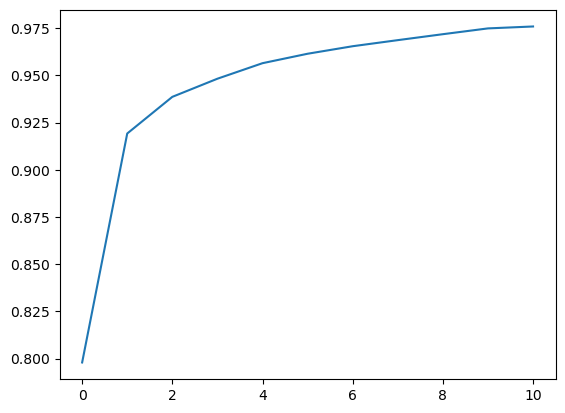

In [16]:
plt.plot(history.history["accuracy"])

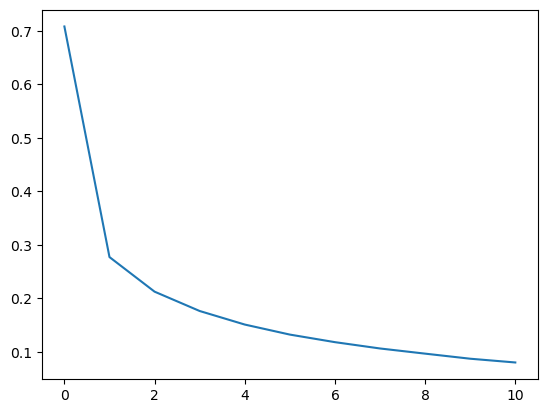

In [17]:
plt.plot(history.history["loss"])


In [18]:
'''
The `to_categorical` function in Keras is used to convert class labels (integers) into a one-hot encoded format. One-hot encoding transforms categorical data into a binary matrix representation, which is beneficial for multi-class classification tasks.

### Detailed Explanation
Suppose you have labels for three classes in the format `[0, 1, 2]`. If you apply `to_categorical` to these labels, each label will be represented by a binary vector with the length equal to the number of unique classes. For example:

```python
from tensorflow.keras.utils import to_categorical

labels = [0, 1, 2]
one_hot_labels = to_categorical(labels)
print(one_hot_labels)
```

**Output**:
```plaintext
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
```

Each label is replaced by a vector with 1 in the position representing the class and 0s elsewhere:
- Class 0 becomes `[1, 0, 0]`
- Class 1 becomes `[0, 1, 0]`
- Class 2 becomes `[0, 0, 1]`

### Why Use `to_categorical`?

1. **Compatibility with Neural Networks**: Neural networks often expect the output in a binary or one-hot encoded format for multi-class classification tasks. In this format, each output neuron corresponds to a specific class, and the network learns to output probabilities for each class.

2. **Categorical Cross-Entropy Loss**: When using the `categorical_crossentropy` loss function, the target labels must be one-hot encoded. This loss function compares each output neuron’s predicted probability with the corresponding element in the one-hot encoded vector.

3. **Enhanced Model Performance**: One-hot encoding helps the model to learn relationships more effectively in multi-class classification tasks since each output node now corresponds to only one class.

### Key Viva Questions:

1. **What is one-hot encoding?**  
   - One-hot encoding represents categories as binary vectors where only one element (the one representing the category) is 1, and others are 0.

2. **Why use `to_categorical` in Keras?**  
   - To convert class labels into a format suitable for multi-class classification, especially when using `categorical_crossentropy` as the loss function.

3. **What is the output of `to_categorical` for a label 2 in a three-class problem?**  
   - `[0, 0, 1]`
'''

'\nThe `to_categorical` function in Keras is used to convert class labels (integers) into a one-hot encoded format. One-hot encoding transforms categorical data into a binary matrix representation, which is beneficial for multi-class classification tasks.\n\n### Detailed Explanation\nSuppose you have labels for three classes in the format `[0, 1, 2]`. If you apply `to_categorical` to these labels, each label will be represented by a binary vector with the length equal to the number of unique classes. For example:\n\n```python\nfrom tensorflow.keras.utils import to_categorical\n\nlabels = [0, 1, 2]\none_hot_labels = to_categorical(labels)\nprint(one_hot_labels)\n```\n\n**Output**:\n```plaintext\n[[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]\n```\n\nEach label is replaced by a vector with 1 in the position representing the class and 0s elsewhere:\n- Class 0 becomes `[1, 0, 0]`\n- Class 1 becomes `[0, 1, 0]`\n- Class 2 becomes `[0, 0, 1]`\n\n### Why Use `to_categorical`?\n\n1. **Compatibility wi